In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna()

,0,1,2,3


In [12]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.497884,NaN,NaN
1,-3.430162,NaN,NaN
2,0.562131,NaN,0.065995
3,-0.039308,NaN,-0.372029
4,0.215175,-2.346680,-0.296614
5,-0.491946,1.990705,0.452757
6,-1.299980,-0.422562,0.594483


In [16]:
df.fillna(0)

,0,1,2
0,-0.497884,0.000000,0.000000
1,-3.430162,0.000000,0.000000
2,0.562131,0.000000,0.065995
3,-0.039308,0.000000,-0.372029
4,0.215175,-2.346680,-0.296614
5,-0.491946,1.990705,0.452757
6,-1.299980,-0.422562,0.594483


In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.497884,0.500000,0.000000
1,-3.430162,0.500000,0.000000
2,0.562131,0.500000,0.065995
3,-0.039308,0.500000,-0.372029
4,0.215175,-2.346680,-0.296614
5,-0.491946,1.990705,0.452757
6,-1.299980,-0.422562,0.594483


In [18]:
df.fillna(method="bfill")

,0,1,2
0,-0.497884,-2.346680,0.065995
1,-3.430162,-2.346680,0.065995
2,0.562131,-2.346680,0.065995
3,-0.039308,-2.346680,-0.372029
4,0.215175,-2.346680,-0.296614
5,-0.491946,1.990705,0.452757
6,-1.299980,-0.422562,0.594483


In [19]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,-0.497884,NaN,0.065995
1,-3.430162,NaN,0.065995
2,0.562131,-2.346680,0.065995
3,-0.039308,-2.346680,-0.372029
4,0.215175,-2.346680,-0.296614
5,-0.491946,1.990705,0.452757
6,-1.299980,-0.422562,0.594483


In [20]:
df.fillna(data.mean())

,0,1,2
0,-0.497884,6.500000,3.000000
1,-3.430162,6.500000,3.000000
2,0.562131,6.500000,0.065995
3,-0.039308,6.500000,-0.372029
4,0.215175,-2.346680,-0.296614
5,-0.491946,1.990705,0.452757
6,-1.299980,-0.422562,0.594483


In [21]:
df.fillna(data.median())

,0,1,2
0,-0.497884,6.500000,3.000000
1,-3.430162,6.500000,3.000000
2,0.562131,6.500000,0.065995
3,-0.039308,6.500000,-0.372029
4,0.215175,-2.346680,-0.296614
5,-0.491946,1.990705,0.452757
6,-1.299980,-0.422562,0.594483


Медиана более устойчива к выбросам

In [22]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<Axes: >

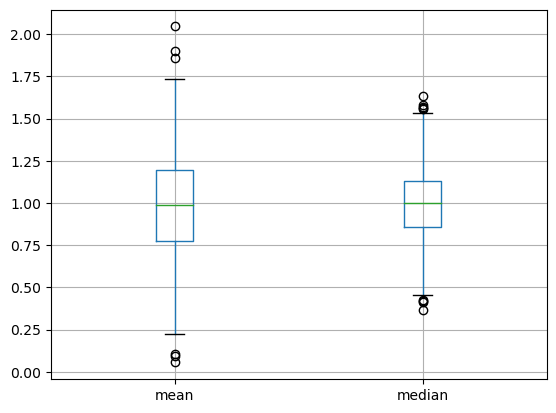

In [23]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-0.497884,NaN,NaN,1
1,-3.430162,NaN,NaN,1
2,0.562131,NaN,0.065995,0
3,-0.039308,NaN,-0.372029,0
4,0.215175,-2.346680,-0.296614,0
5,-0.491946,1.990705,0.452757,0
6,-1.299980,-0.422562,0.594483,0


Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [28]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,False,False,True
7,False,True,False,False,False,False
8,False,False,True,False,False,False
9,False,False,False,True,False,False


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [37]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

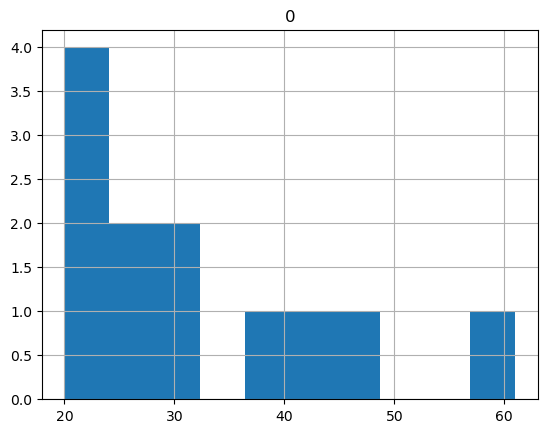

In [38]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [39]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [40]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [42]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\nasta\AppData\Local\Temp\ipykernel_3296\1753499592.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<Axes: ylabel='Density'>

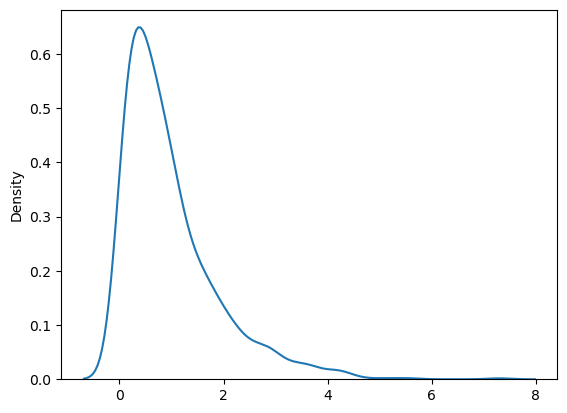

In [43]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\nasta\AppData\Local\Temp\ipykernel_3296\1776627611.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

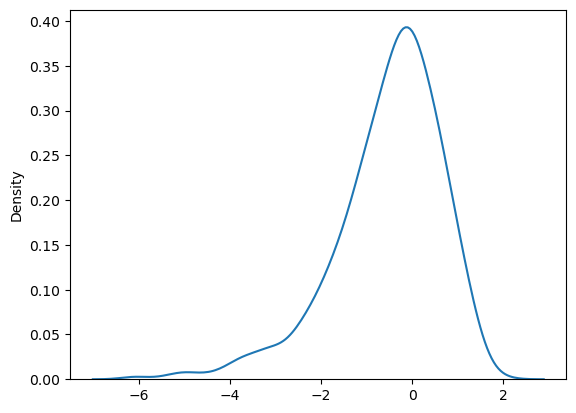

In [44]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\nasta\AppData\Local\Temp\ipykernel_3296\2198520673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<Axes: ylabel='Density'>

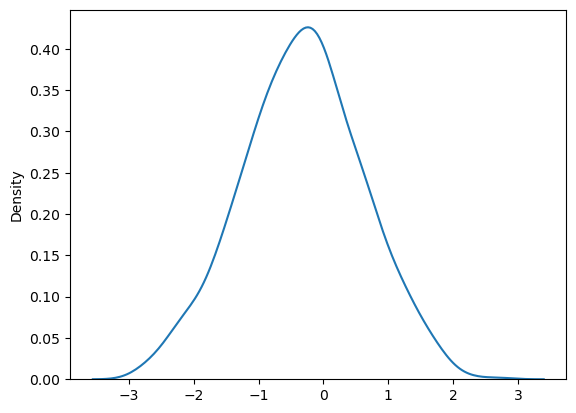

In [45]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [46]:
best_lambda

0.291501556508969

# Домашнее задание

In [171]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [172]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

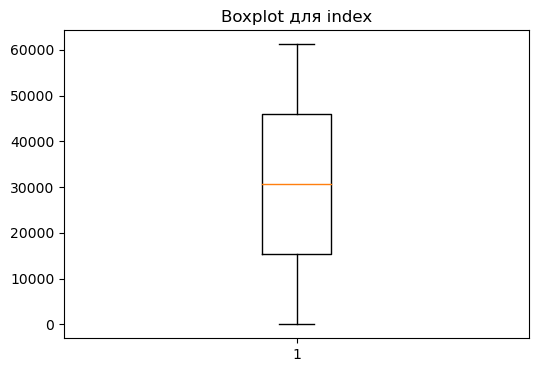

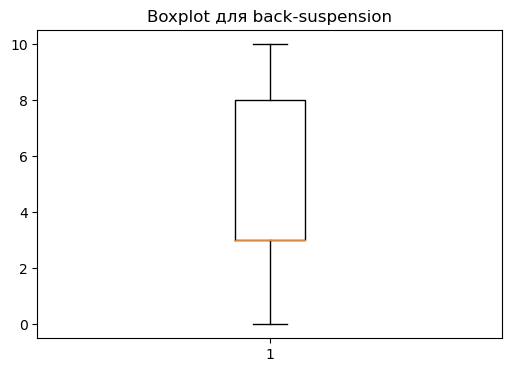

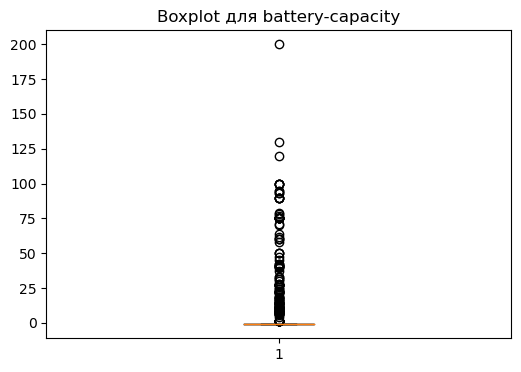

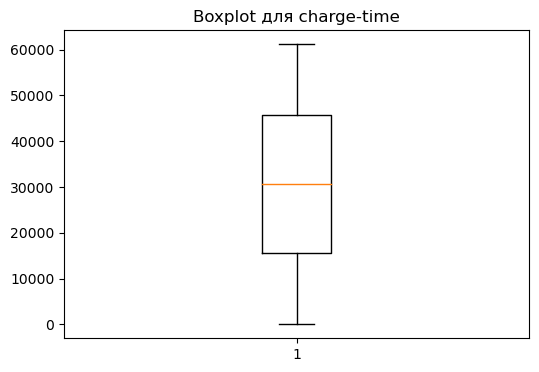

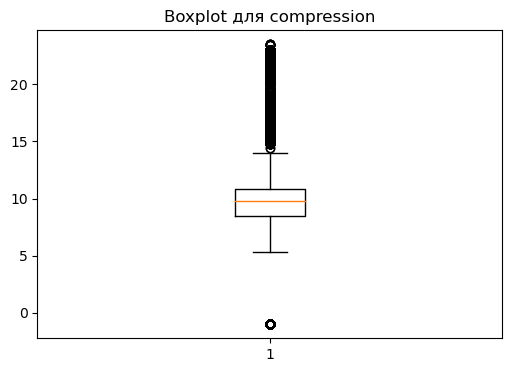

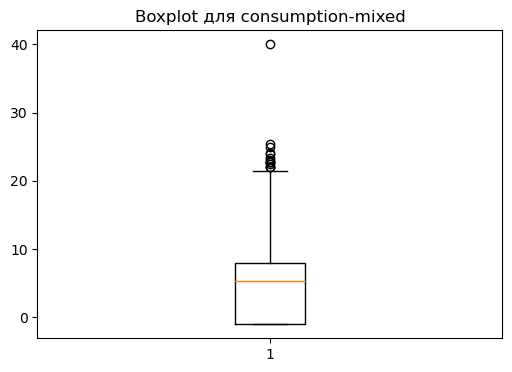

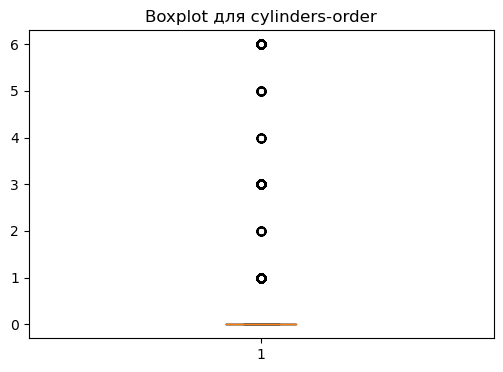

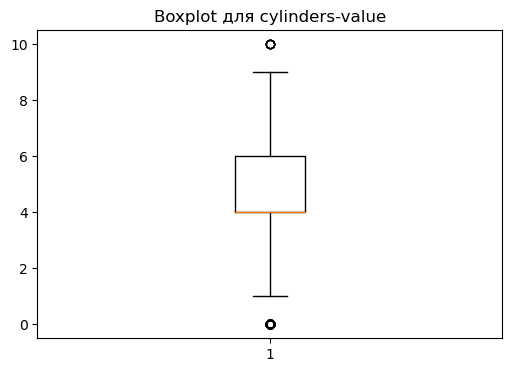

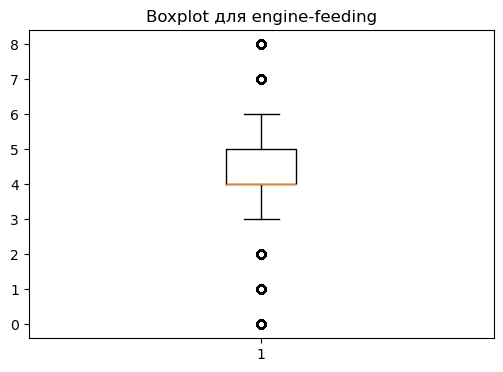

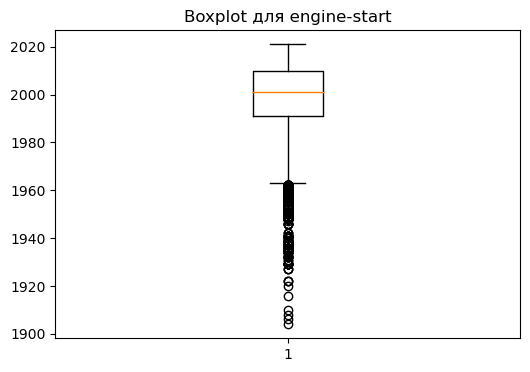

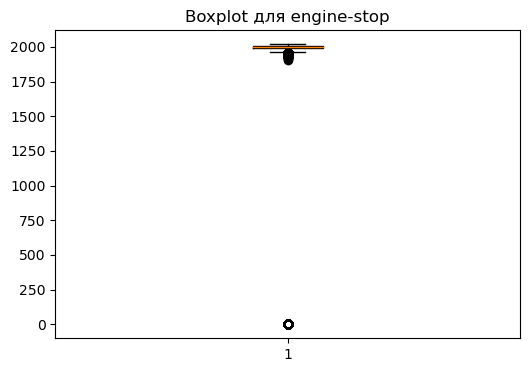

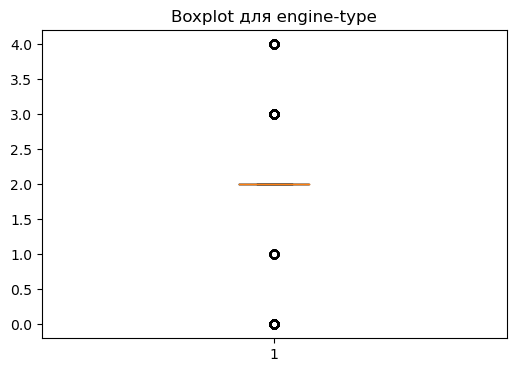

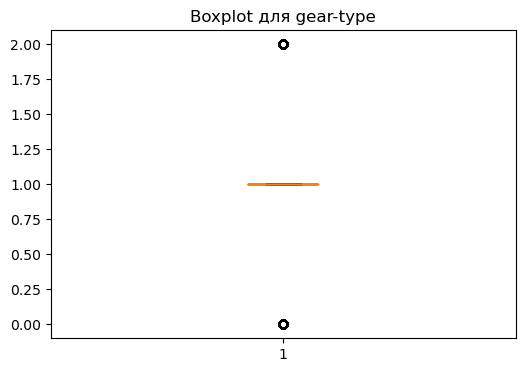

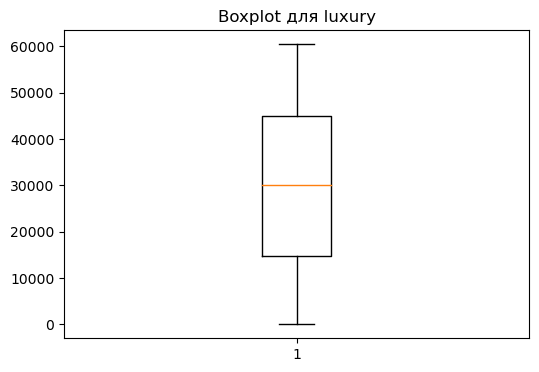

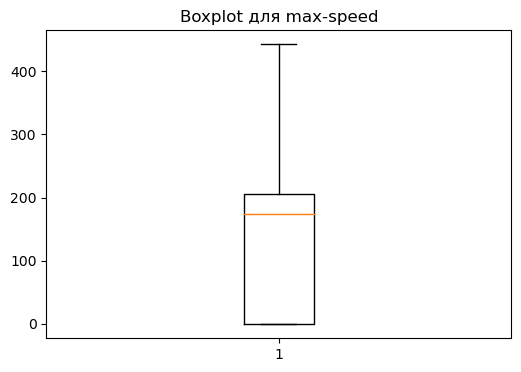

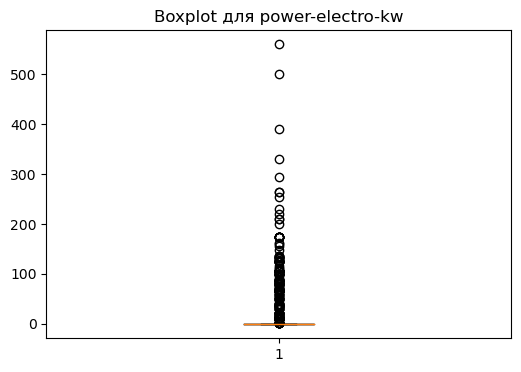

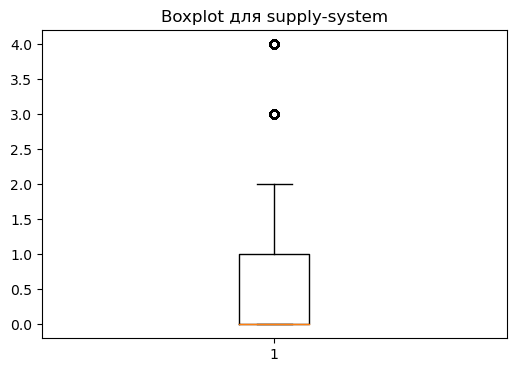

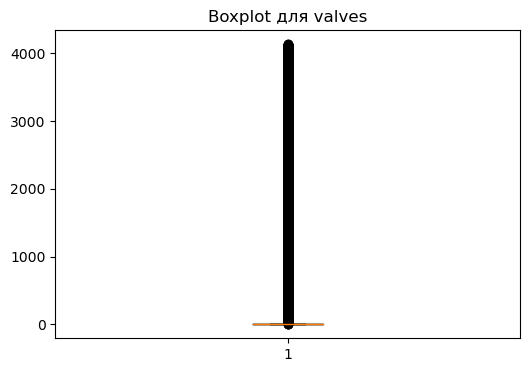

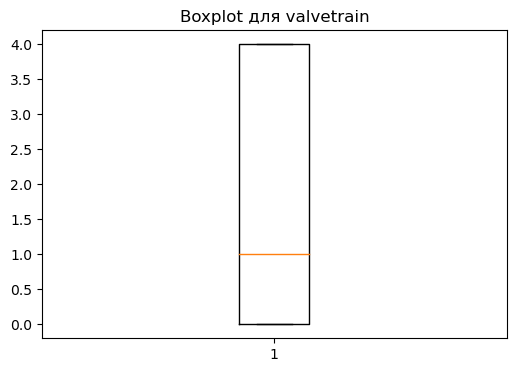

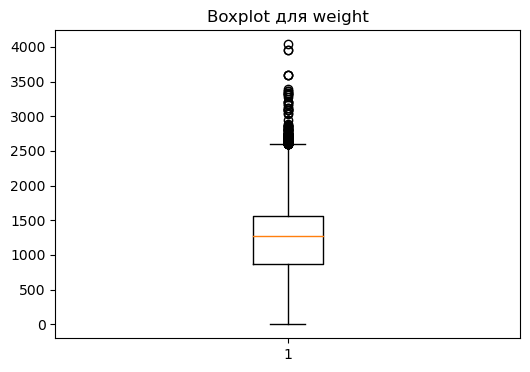

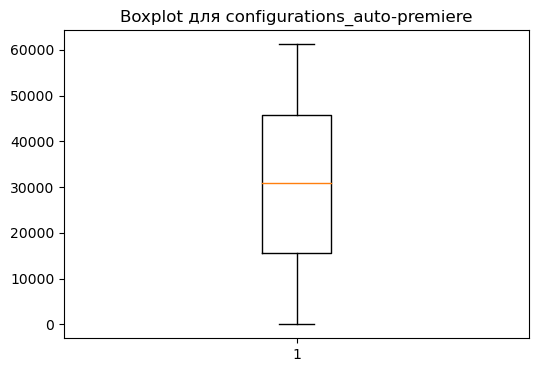

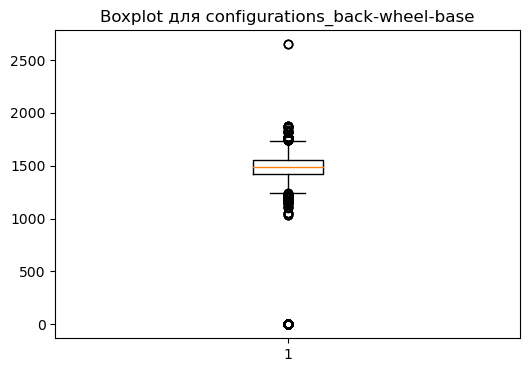

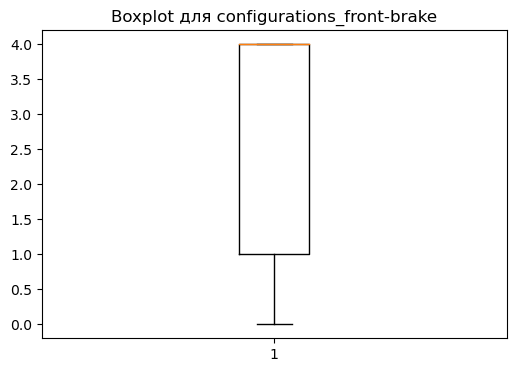

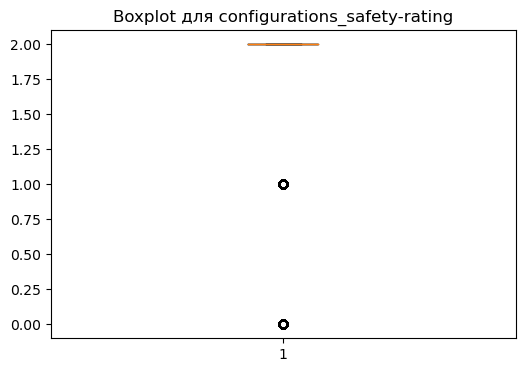

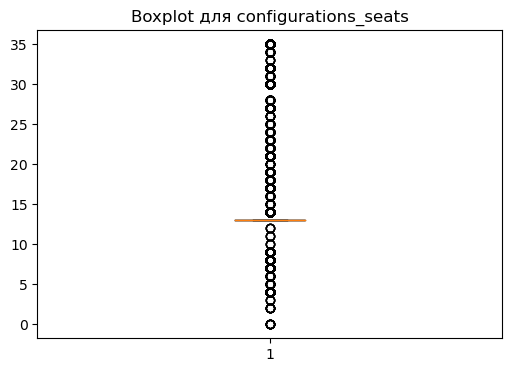

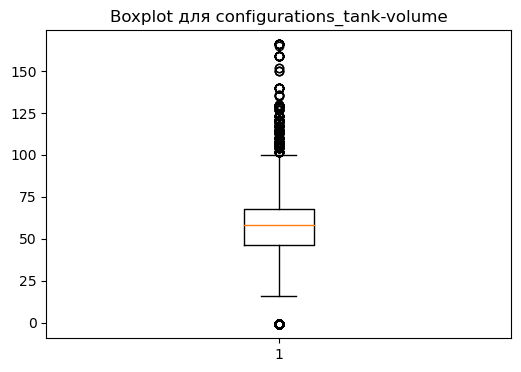

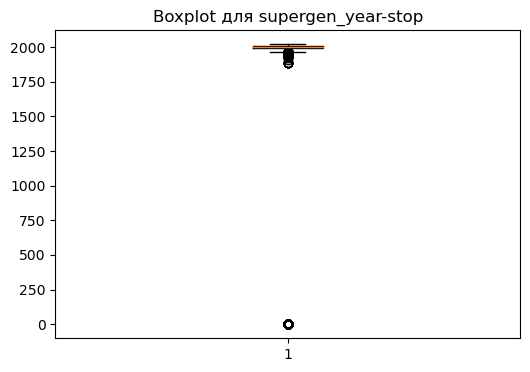

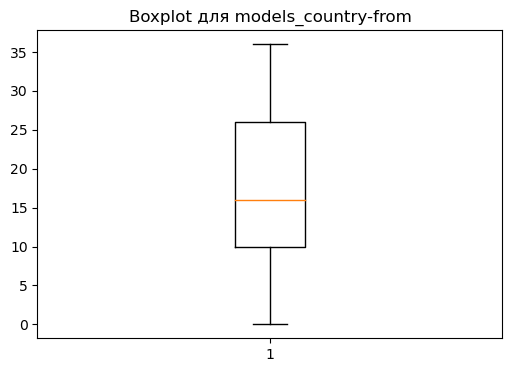

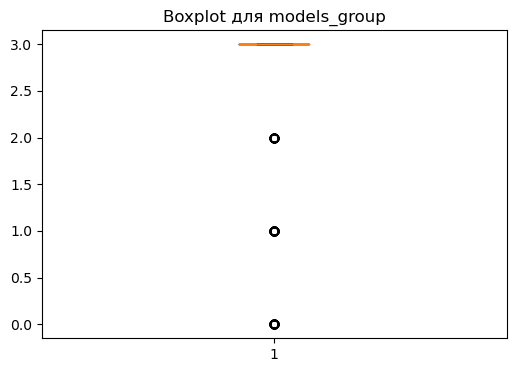

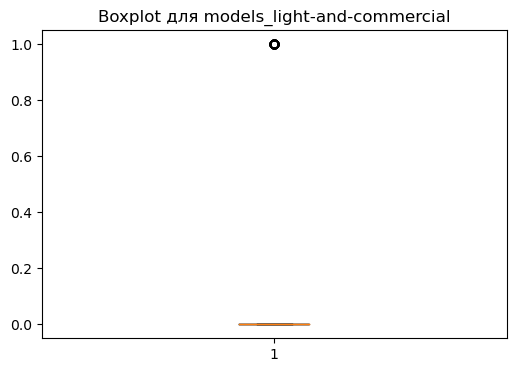

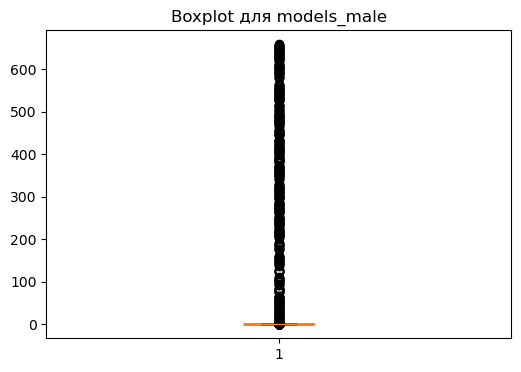

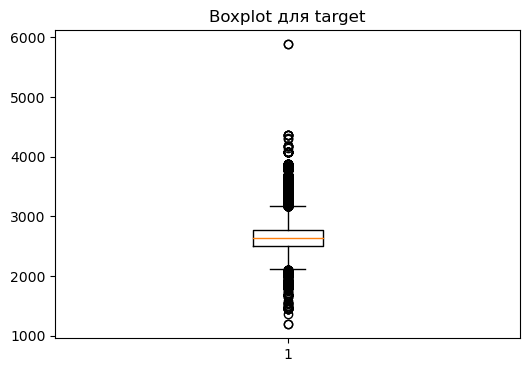

In [174]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    
    plt.boxplot(df[column])
    plt.title(f'Boxplot для {column}')
    plt.show()

In [175]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


cleaned_data = df.copy()
for column in cleaned_data.columns:
    cleaned_data = remove_outliers(cleaned_data, column)

In [176]:
df = cleaned_data

In [177]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
21,26,3,-1.0,12070,9.9,8.8,0,4,4,2001,...,4,2,13,62.0,2008.0,16,3,0,1,2680
22,27,8,-1.0,14202,9.9,6.6,0,4,4,2002,...,4,2,13,60.0,2006.0,16,3,0,1,2535
34,41,3,-1.0,4009,9.8,8.0,0,4,4,2003,...,4,2,13,60.0,2006.0,9,3,0,1,2686
54,75,10,-1.0,15463,10.8,-1.0,0,4,4,1995,...,1,2,13,60.0,2001.0,34,3,0,1,2637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43207,61176,8,-1.0,22566,9.5,9.5,0,4,4,2000,...,4,2,13,62.0,2005.0,10,3,0,1,2703
43214,61190,3,-1.0,5133,9.5,7.8,0,4,4,1996,...,4,2,13,49.0,2001.0,35,3,0,1,2601
43223,61203,3,-1.0,22854,10.0,7.9,0,4,1,1988,...,1,2,13,70.0,1997.0,10,3,0,1,2623
43229,61210,3,-1.0,43741,9.0,8.6,0,4,4,1994,...,1,2,13,63.0,1996.0,35,3,0,1,2664


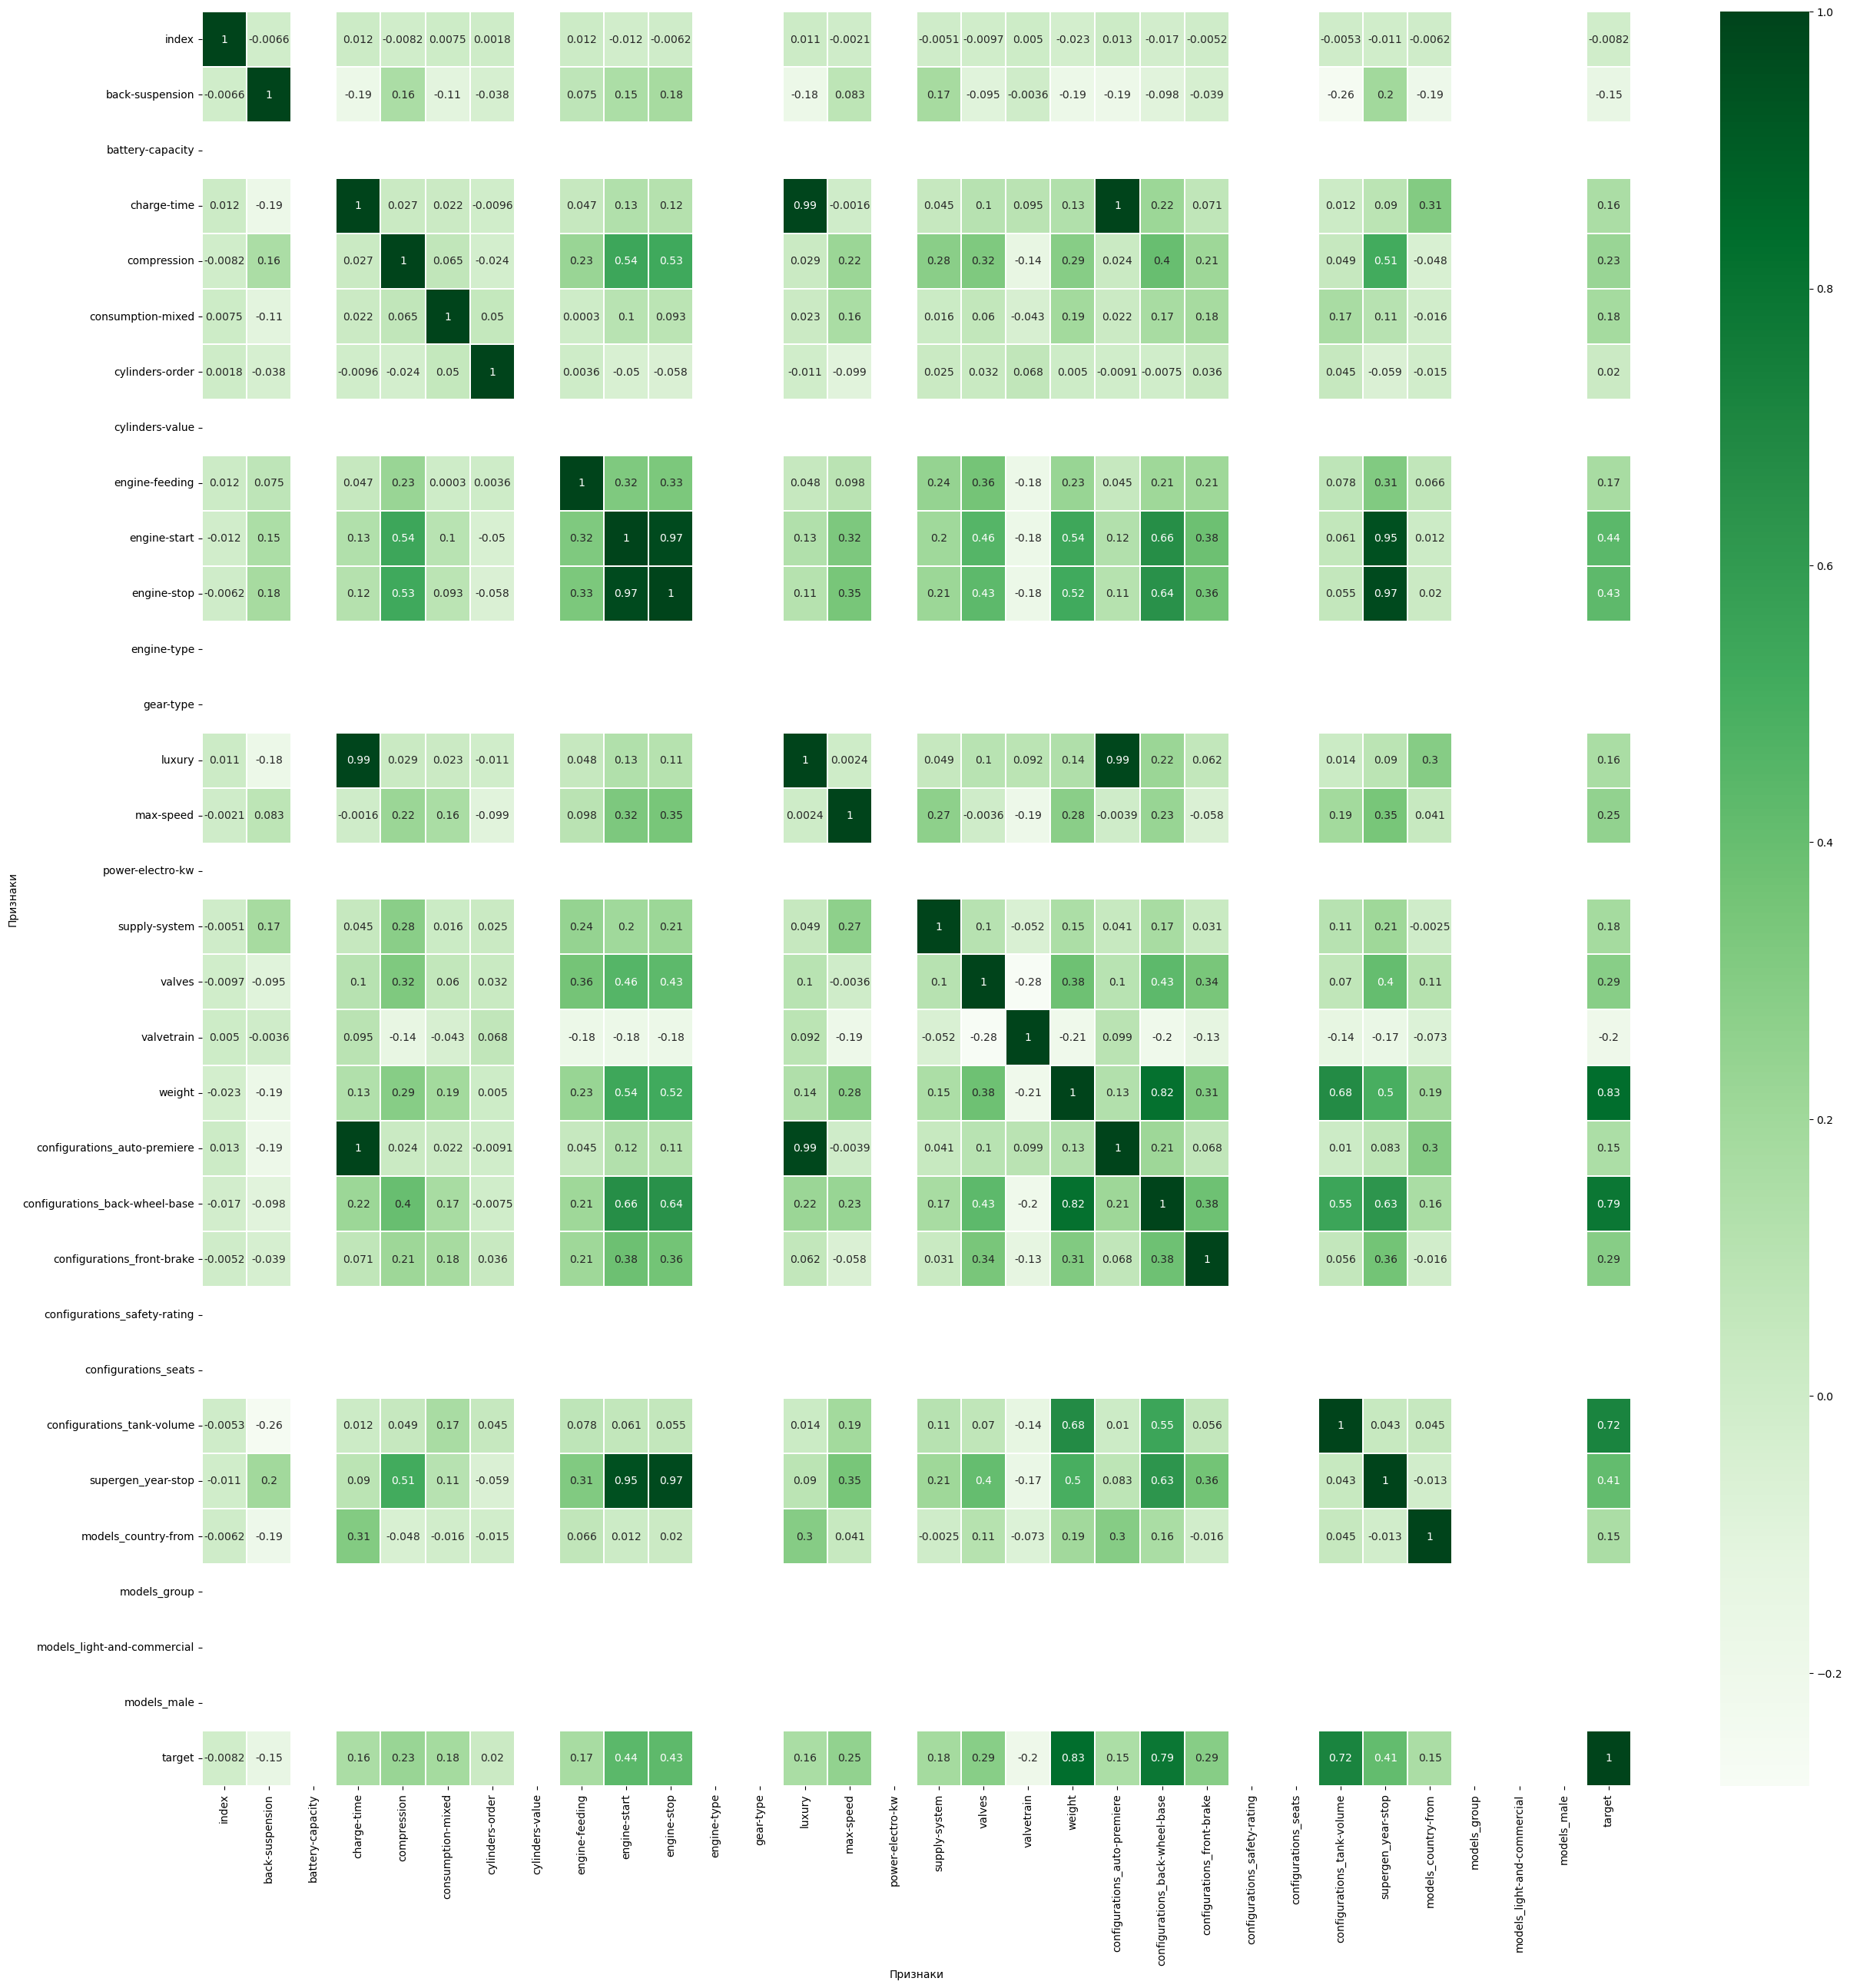

In [178]:
plt.figure(figsize = (30, 30))
ax = sns.heatmap(df.corr(), 
                 linewidth=0.1, 
                 linecolor='w', 
                 cmap='Greens', 
                 annot=True, 
                 fmt='.2g')

ax.set(ylabel="Признаки")
ax.set(xlabel="Признаки");


In [179]:
df['battery-capacity'].unique()

array([-1.])

In [180]:
df['cylinders-value'].unique()

array([4], dtype=int64)

In [181]:
df['engine-type'].unique()

array([2], dtype=int64)

In [182]:
df['gear-type'].unique()

array([1], dtype=int64)

In [183]:
df['power-electro-kw'].unique()

array([-1.])

In [184]:
df['configurations_seats'].unique()

array([13], dtype=int64)

In [185]:
df['models_group'].unique()

array([3], dtype=int64)

In [186]:
df['models_light-and-commercial'].unique()

array([0], dtype=int64)

In [187]:
df['models_male'].unique()

array([1], dtype=int64)

In [188]:
unique_counts = df.nunique()
single_value_columns = unique_counts[unique_counts == 1].index
df = df.drop(columns=single_value_columns)

In [189]:
df.drop('index', axis=1, inplace=True)

In [190]:
df

,back-suspension,charge-time,compression,consumption-mixed,cylinders-order,engine-feeding,engine-start,engine-stop,luxury,max-speed,...,valves,valvetrain,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_tank-volume,supergen_year-stop,models_country-from,target
3,0,41405,10.3,-1.0,0,4,2000,2003,40914,189.0,...,0,1,1090.0,41425,1495.0,4,55.0,2003.0,10,2513
21,3,12070,9.9,8.8,0,4,2001,2008,14212,195.0,...,2,0,1315.0,12064,1534.0,4,62.0,2008.0,16,2680
22,8,14202,9.9,6.6,0,4,2002,2006,13492,177.0,...,2,0,1110.0,14215,1455.0,4,60.0,2006.0,16,2535
34,3,4009,9.8,8.0,0,4,2003,2006,3542,202.0,...,2,0,1275.0,4036,1514.0,4,60.0,2006.0,9,2686
54,10,15463,10.8,-1.0,0,4,1995,2000,15018,215.0,...,2,0,1346.0,15540,1470.0,1,60.0,2001.0,34,2637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43207,8,22566,9.5,9.5,0,4,2000,2005,22131,211.0,...,3,0,1376.0,22534,1515.0,4,62.0,2005.0,10,2703
43214,3,5133,9.5,7.8,0,4,1996,2001,22496,180.0,...,2,0,1120.0,5107,1422.0,4,49.0,2001.0,35,2601
43223,3,22854,10.0,7.9,0,1,1988,1997,22387,173.0,...,0,1,1173.0,22880,1422.0,1,70.0,1997.0,10,2623
43229,3,43741,9.0,8.6,0,4,1994,1996,43351,-1.0,...,0,4,1358.0,43848,1442.0,1,63.0,1996.0,35,2664


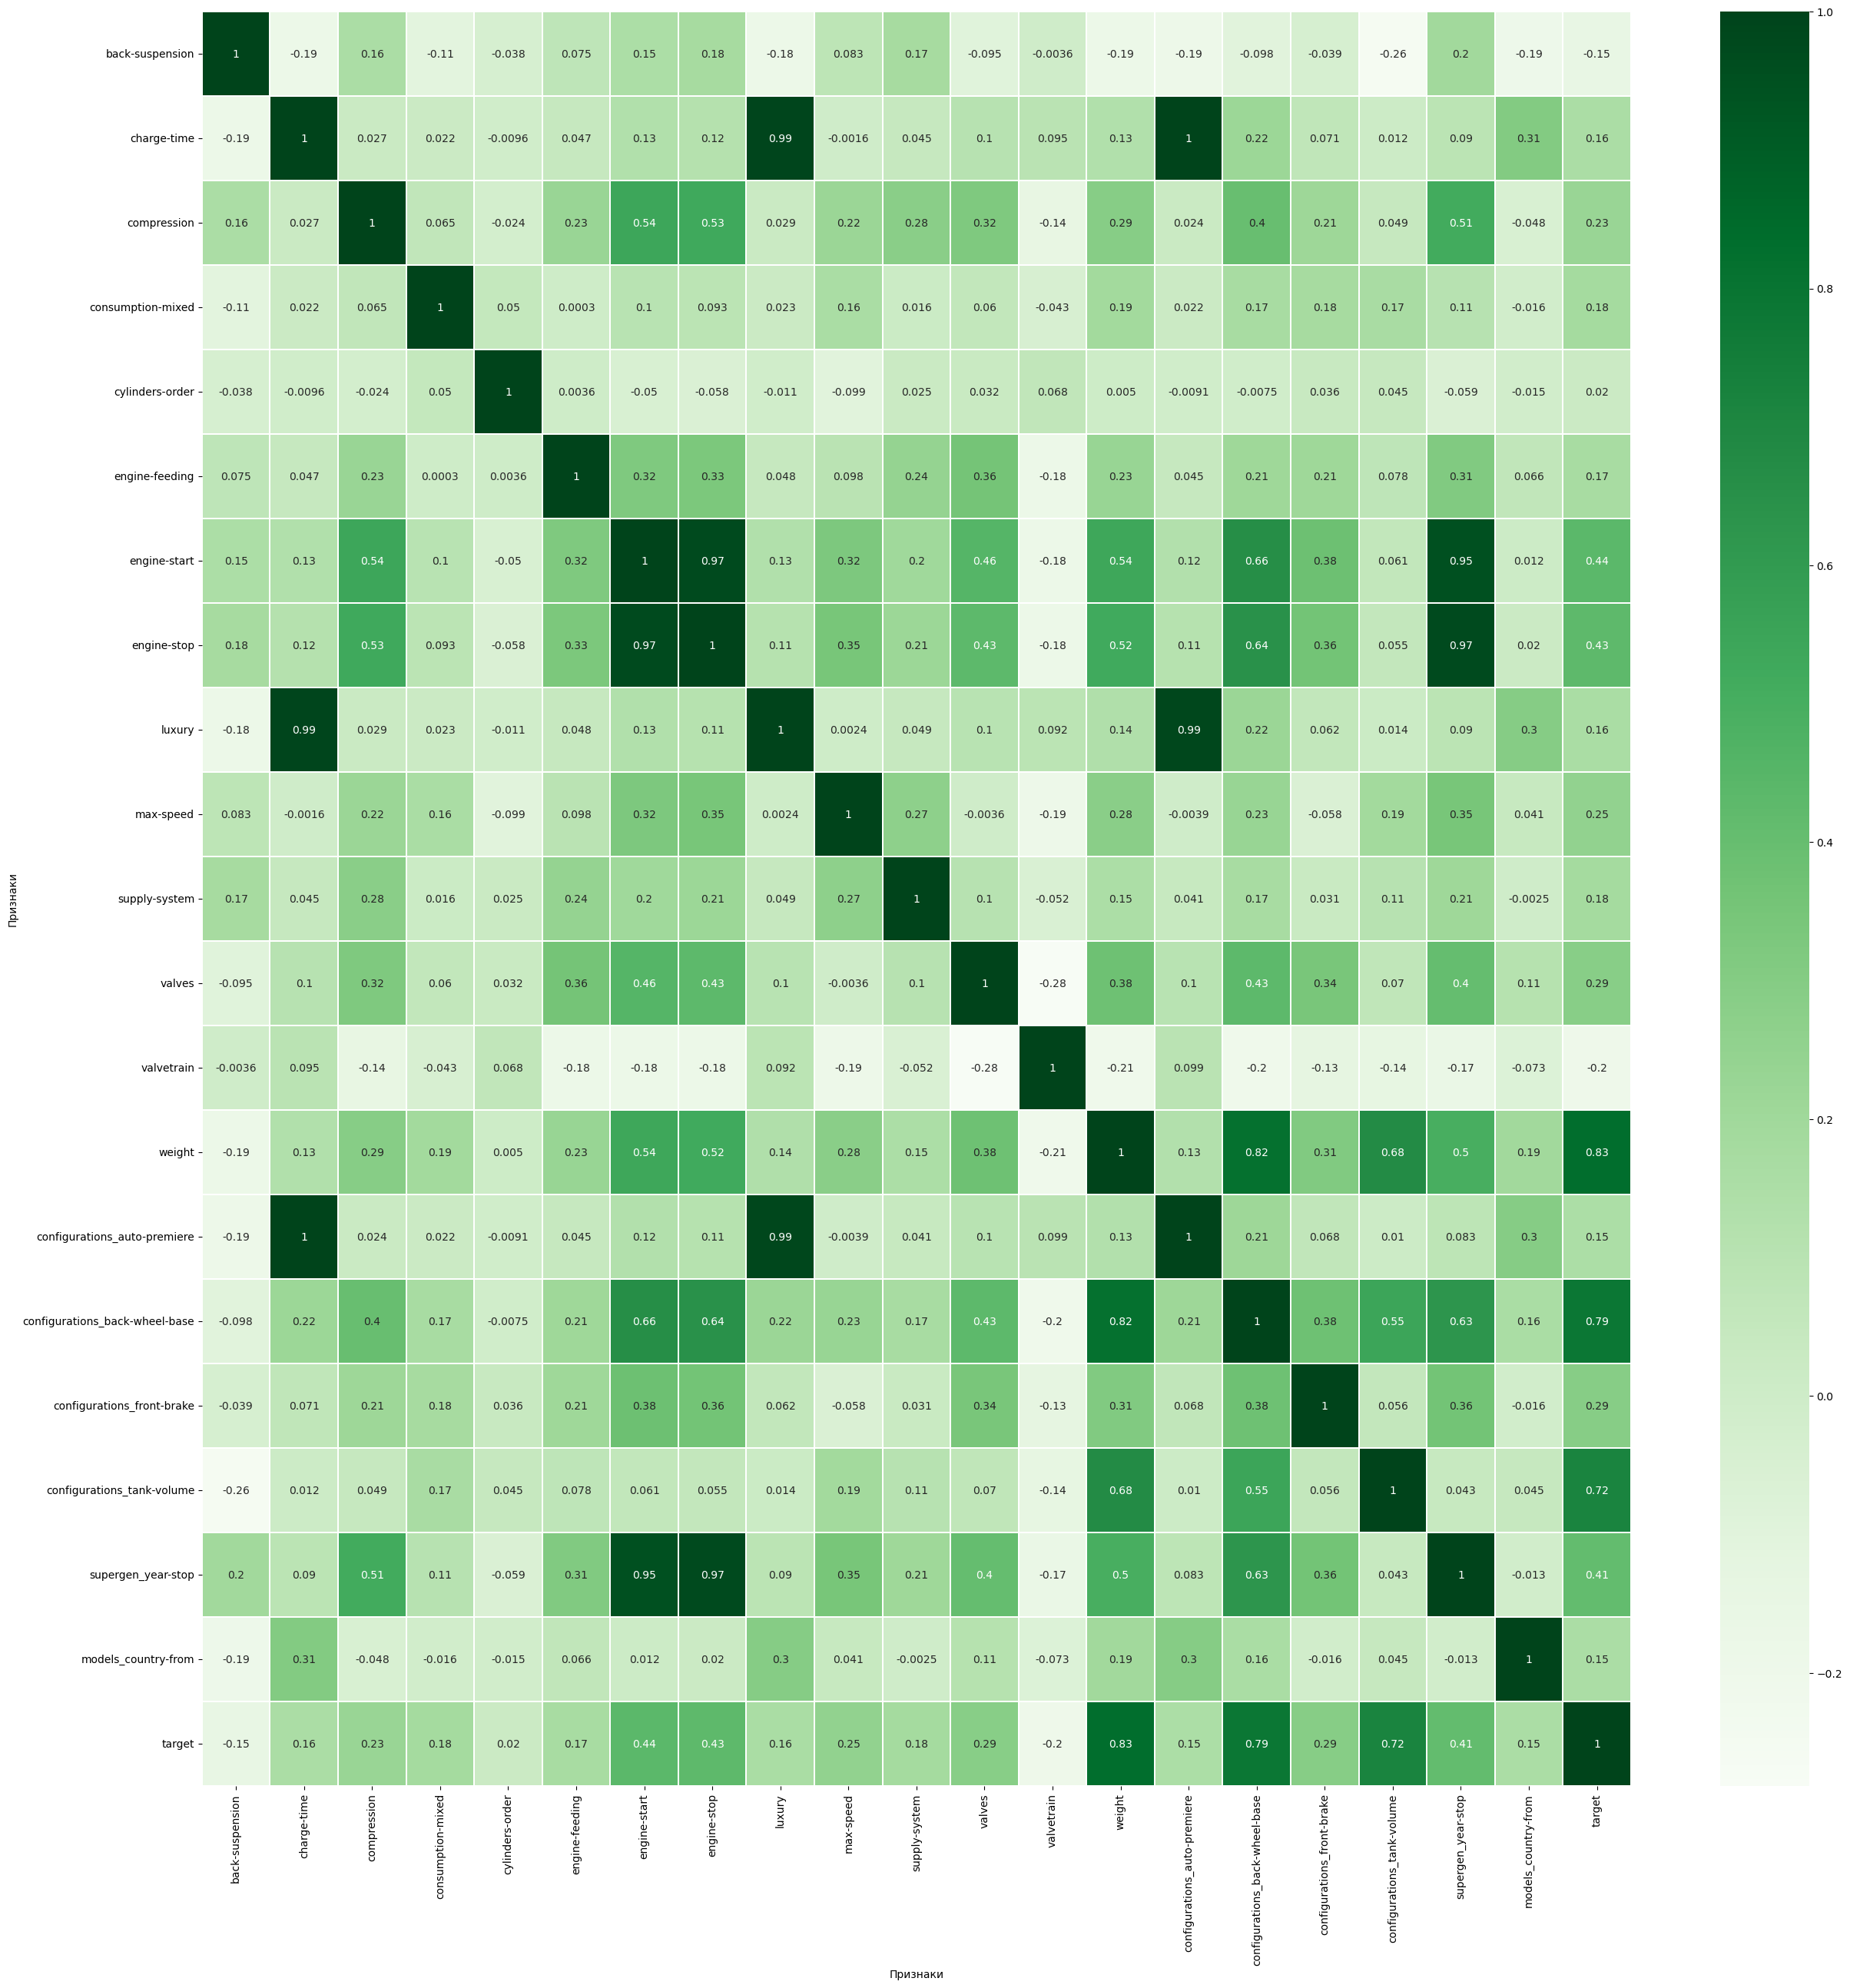

In [191]:
plt.figure(figsize = (30, 30))
ax = sns.heatmap(df.corr(), 
                 linewidth=0.1, 
                 linecolor='w', 
                 cmap='Greens', 
                 annot=True, 
                 fmt='.2g')

ax.set(ylabel="Признаки")
ax.set(xlabel="Признаки");


#### Линейная регрессия:

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [193]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [194]:
reg = LinearRegression().fit(train_X, train_y)

In [195]:
reg.score(train_X, train_y)

0.7874705237053365

In [196]:
mean_squared_error(reg.predict(train_X), train_y)

2937.1909907213485

In [197]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [198]:
scores

{'fit_time': array([0.01200342, 0.01299739, 0.00600004]),
 'score_time': array([0.00700068, 0.00400829, 0.00400186]),
 'test_score': array([-3096.23505762, -3065.78103689, -2860.53375832])}

In [199]:
mean_squared_error(reg.predict(test_X), test_y)

3034.6658594269607

## ДЗ

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [202]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Ridge-регрессия:

In [203]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [204]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [205]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [206]:
ridge_cv_model.alpha_

1.0

In [207]:
test_predictions = ridge_cv_model.predict(X_test)

In [208]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [209]:
mse = mean_squared_error(y_test,test_predictions)
rmse = mean_squared_error(y_test,test_predictions, squared=False)
mae = mean_absolute_error(y_test,test_predictions)
mape = mean_absolute_percentage_error(y_test,test_predictions)
r2 = r2_score(y_test,test_predictions)

In [210]:
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 3033.0779735255724
Среднеквадратическая ошибка (RMSE): 55.0733871622726
Средняя абсолютная ошибка (MAE): 42.26227945330484
Средняя абсолютная ошибка  (MAPE): 0.016496228876415386
Коэффициент детерминации (R^2): 0.7682102424548686


#### Lasso-регрессия:

In [211]:
from sklearn.linear_model import LassoCV

In [212]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [213]:
lasso_cv_model.fit(X_train,y_train)

C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5, eps=0.1)

In [214]:
test_predictions = lasso_cv_model.predict(X_test)

In [215]:
mse = mean_squared_error(y_test,test_predictions)
rmse = mean_squared_error(y_test,test_predictions, squared=False)
mae = mean_absolute_error(y_test,test_predictions)
mape = mean_absolute_percentage_error(y_test,test_predictions)
r2 = r2_score(y_test,test_predictions)

In [216]:
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 3229.1774115184157
Среднеквадратическая ошибка (RMSE): 56.82585161278637
Средняя абсолютная ошибка (MAE): 43.867624214667416
Средняя абсолютная ошибка  (MAPE): 0.017127706183564555
Коэффициент детерминации (R^2): 0.7532241980525008
